In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df.duration.min(), df.duration.max()

(0.83, 49.83)

#### Preprocessing

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x =='Business' else 0)

In [12]:
df.stops = pd.factorize(df.stops)[0]

In [13]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [14]:
df = df.join(pd.get_dummies(df.airline, prefix="airline", dtype=int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix="source", dtype=int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix="dest", dtype=int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival", dtype=int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure", dtype=int)).drop('departure_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Training Regression Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
X, y = df.drop('price', axis=1), df['price']

In [17]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [18]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
reg.score(X_test, y_test) # r2 score

0.9853912106902882

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [23]:
y_pred = reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

R2: 0.9853912106902882


In [24]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1066.6056478761768
MSE: 7469076.667025567
RMSE: 2732.961153588826


Text(0.5, 1.0, 'Prediction vs Actual Price')

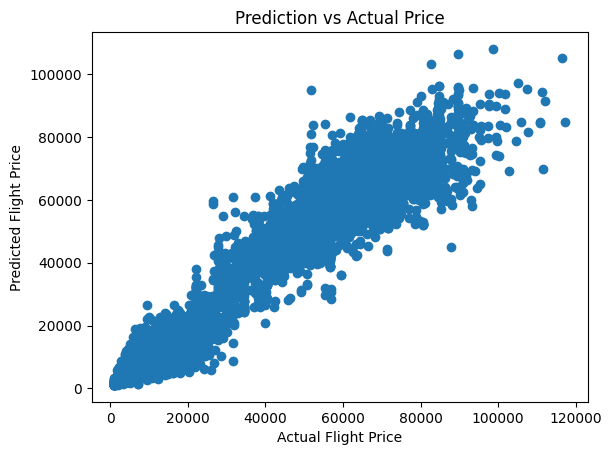

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

In [26]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8796128894319101),
 ('duration', 0.057757512203836646),
 ('days_left', 0.01854589740012456),
 ('airline_Vistara', 0.005022767077531464),
 ('airline_Air_India', 0.005011773272533318),
 ('source_Delhi', 0.0037784148646274173),
 ('dest_Delhi', 0.0033467536644907524),
 ('source_Mumbai', 0.0022168171543054897),
 ('dest_Mumbai', 0.0019646245508473715),
 ('dest_Kolkata', 0.0018023688926978173),
 ('source_Kolkata', 0.0018013898384445911),
 ('stops', 0.0017700156188360568),
 ('arrival_Evening', 0.0015240138307956415),
 ('dest_Hyderabad', 0.0015209051422065433),
 ('source_Hyderabad', 0.0012873102768409745),
 ('dest_Bangalore', 0.0012363948175593868),
 ('arrival_Night', 0.0011521553686437496),
 ('departure_Evening', 0.0011125436827089813),
 ('source_Bangalore', 0.001050510734894779),
 ('arrival_Afternoon', 0.0010306828462914072),
 ('dest_Chennai', 0.0009198995600111667),
 ('source_Chennai', 0.0009122542821286589),
 ('departure_Morning', 0.0008767078317457143),
 ('departure_Night', 0.

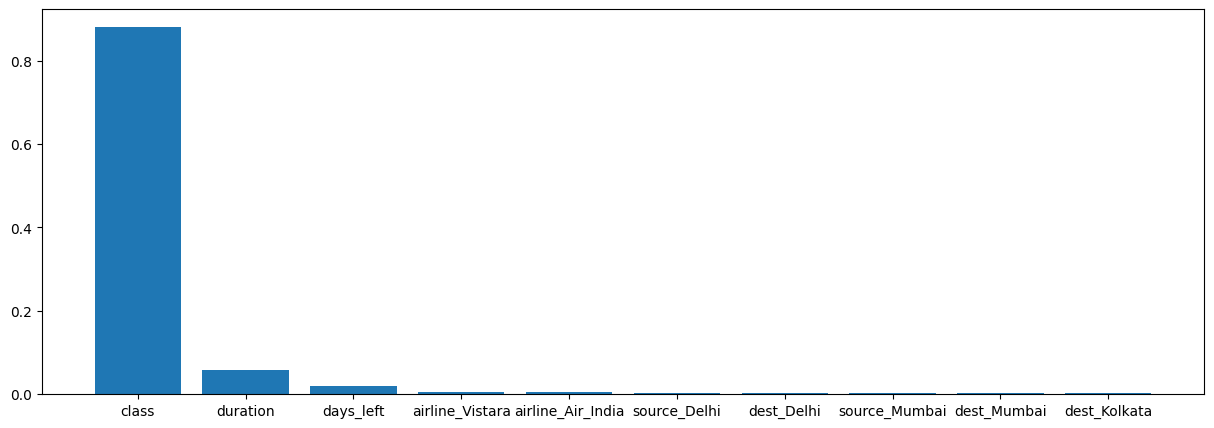

In [27]:
plt.figure(figsize=(15,5))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])
plt.show()

#### Grid Search Cross Validation

In [28]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# grid_search = GridSearchCV(reg, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

#### Randomized Search Cross Validation

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, 
                                   param_distributions=param_dist, 
                                   n_iter=2, 
                                   cv=3, 
                                   scoring='neg_mean_squared_error', 
                                   verbose=2,
                                  random_state=44)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=196; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=196; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=196; total time=   0.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=155; total time=  18.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=155; total time=  16.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=155; total time=  15.8s


/home/johnadi/Desktop/projects/projects-from-yt-channel-neuralnine/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/johnadi/Desktop/projects/projects-from-yt-channel-neuralnine/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/johnadi/Desktop/projects/projects-from-yt-channel-neuralnine/env/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/john

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [1.0, 'auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x739c81cc67a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x739c78ad7370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x739c7ac036d0>},
                   random_state=44, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
best_regressor = random_search.best_estimator_
best_regressor

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_split=9,
                      n_estimators=155, n_jobs=-1)

In [31]:
best_regressor.score(X_test, y_test)

0.9851485912851841

In [32]:
y_pred = best_regressor.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MAE: 1306.1375026712888
MSE: 7593121.370471773
RMSE: 2755.5618974125355
R2: 0.9851485912851841


Text(0.5, 1.0, 'Prediction vs Actual Price')

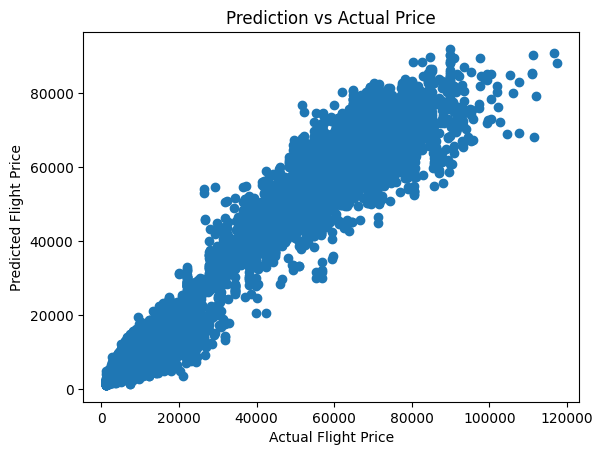

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')